<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [1]:
# Write your code here

# Retrived data created in previous work
import requests
# Download dataset
url = 'https://raw.githubusercontent.com/jbest/Jason_INFO5731_Spring2021/main/citeseerx_results_sentiment.csv'
r = requests.get(url)
with open("dataset.csv", 'wb') as f:
    f.write(r.content) 

In [2]:
# Load dataset
import pandas as pd
df=pd.read_csv('dataset.csv')
# replace empty cells
df.abstract = df.abstract.fillna('')
df.head()

,doc_id,abstract,sentiment
0,10.1.1.121.2604,,neutral
1,10.1.1.103.7637,The concept of maximum entropy can be traced b...,neutral
2,10.1.1.905.8483,Scaling conditional random fields for natural ...,neutral
3,10.1.1.463.8510,The paper addresses the issue of cooperation b...,neutral
4,10.1.1.21.6514,In most natural language processing applicatio...,neutral


In [3]:
# add lowercase
df['abs_lower'] = df['abstract'].str.lower()
df.head()

,doc_id,abstract,sentiment,abs_lower
0,10.1.1.121.2604,,neutral,
1,10.1.1.103.7637,The concept of maximum entropy can be traced b...,neutral,the concept of maximum entropy can be traced b...
2,10.1.1.905.8483,Scaling conditional random fields for natural ...,neutral,scaling conditional random fields for natural ...
3,10.1.1.463.8510,The paper addresses the issue of cooperation b...,neutral,the paper addresses the issue of cooperation b...
4,10.1.1.21.6514,In most natural language processing applicatio...,neutral,in most natural language processing applicatio...


In [4]:
# remove stop words
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

def remove_stops(text=None):
  toks = tokenizer.tokenize(text)
  return ' '.join([i for i in toks if not i in stopwords])

df['abs_nostops'] = df['abs_lower'].apply(remove_stops)
#df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Stem
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

def stem(text=None):
  toks = tokenizer.tokenize(text)
  return ' '.join([p_stemmer.stem(i) for i in toks])

df['abs_stemmed'] = df['abs_nostops'].apply(stem)
#df.head()

In [6]:
# load docs into list
docs = []
for doc in df.abs_stemmed:
  docs.append([doc])
docs[1]

['concept maximum entropi trace back along multipl thread biblic time recent howev comput becom power enough permit widescal applic concept real world problem statist estim pattern recognit paper describ method statist model base maximum entropi present maximum likelihood approach automat construct maximum entropi model describ implement approach effici use exampl sever problem natur languag process']

In [7]:
# Assemble words for n-gram analysis
word_data = ''
for doc in docs:
  word_data = word_data + doc[0]
#print(word_data)

In [ ]:
# Bigrams for modeling
nltk.download('punkt')
words = nltk.word_tokenize(str(word_data))

bigrams = nltk.bigrams(words)
bi_freq = nltk.FreqDist(bigrams)
bi_freq

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FreqDist({('concept', 'maximum'): 1,
          ('maximum', 'entropi'): 4,
          ('entropi', 'trace'): 1,
          ('trace', 'back'): 1,
          ('back', 'along'): 1,
          ('along', 'multipl'): 1,
          ('multipl', 'thread'): 1,
          ('thread', 'biblic'): 1,
          ('biblic', 'time'): 1,
          ('time', 'recent'): 1,
          ('recent', 'howev'): 1,
          ('howev', 'comput'): 1,
          ('comput', 'becom'): 1,
          ('becom', 'power'): 1,
          ('power', 'enough'): 1,
          ('enough', 'permit'): 1,
          ('permit', 'widescal'): 1,
          ('widescal', 'applic'): 1,
          ('applic', 'concept'): 1,
          ('concept', 'real'): 1,
          ('real', 'world'): 2,
          ('world', 'problem'): 1,
          ('problem', 'statist'): 1,
          ('statist', 'estim'): 1,
          ('estim', 'pattern'): 1,
          ('pattern', 'recognit'): 1,
          ('recognit', 'paper'): 1,
          ('paper', 'describ'): 4,
          ('describ', 'm

In [ ]:
# Trigrams for modeling
nltk.download('punkt')
words = nltk.word_tokenize(str(word_data))

trigrams = nltk.trigrams(words)
tri_freq = nltk.FreqDist(trigrams)
tri_freq

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FreqDist({('concept', 'maximum', 'entropi'): 1,
          ('maximum', 'entropi', 'trace'): 1,
          ('entropi', 'trace', 'back'): 1,
          ('trace', 'back', 'along'): 1,
          ('back', 'along', 'multipl'): 1,
          ('along', 'multipl', 'thread'): 1,
          ('multipl', 'thread', 'biblic'): 1,
          ('thread', 'biblic', 'time'): 1,
          ('biblic', 'time', 'recent'): 1,
          ('time', 'recent', 'howev'): 1,
          ('recent', 'howev', 'comput'): 1,
          ('howev', 'comput', 'becom'): 1,
          ('comput', 'becom', 'power'): 1,
          ('becom', 'power', 'enough'): 1,
          ('power', 'enough', 'permit'): 1,
          ('enough', 'permit', 'widescal'): 1,
          ('permit', 'widescal', 'applic'): 1,
          ('widescal', 'applic', 'concept'): 1,
          ('applic', 'concept', 'real'): 1,
          ('concept', 'real', 'world'): 1,
          ('real', 'world', 'problem'): 1,
          ('world', 'problem', 'statist'): 1,
          ('problem', 'st

In [ ]:
# adapted from https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles
  
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()


In [ ]:
number_of_topics=7
words=10
#document_list,titles=load_data("","articles.txt")
document_list = list(df.abs_stemmed)
titles = list(df.doc_id)
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '-0.557*"languag" + -0.426*"natur" + -0.405*"process" + -0.165*"nlp" + -0.153*"system" + -0.136*"use" + -0.134*"learn" + -0.119*"inform" + -0.105*"comput" + -0.089*"model"'), (1, '-0.380*"use" + 0.350*"languag" + 0.212*"natur" + -0.209*"base" + -0.182*"web" + -0.172*"model" + -0.169*"inform" + -0.146*"system" + -0.145*"task" + -0.136*"knowledg"'), (2, '0.687*"de" + 0.210*"evalu" + 0.204*"valuat" + 0.163*"nou" + 0.152*"la" + 0.125*"äô" + 0.122*"le" + 0.122*"l" + 0.122*"du" + 0.122*"standard"'), (3, '-0.454*"learn" + -0.312*"educ" + -0.208*"system" + 0.197*"inform" + -0.191*"machin" + 0.190*"content" + -0.162*"program" + 0.155*"web" + 0.153*"natur" + 0.132*"languag"'), (4, '-0.526*"nlp" + 0.189*"unit" + 0.175*"logic" + -0.164*"content" + -0.160*"educ" + -0.149*"evalu" + 0.146*"learn" + -0.145*"provid" + -0.144*"inform" + 0.138*"semant"'), (5, '0.294*"model" + -0.247*"annot" + -0.236*"inform" + 0.228*"unit" + 0.192*"task" + -0.189*"system" + 0.186*"nlp" + -0.171*"prolog" + -0.171*"ie

In [ ]:
print(model.print_topics(num_topics=20, num_words=10))

[(0, '-0.557*"languag" + -0.426*"natur" + -0.405*"process" + -0.165*"nlp" + -0.153*"system" + -0.136*"use" + -0.134*"learn" + -0.119*"inform" + -0.105*"comput" + -0.089*"model"'), (1, '-0.380*"use" + 0.350*"languag" + 0.212*"natur" + -0.209*"base" + -0.182*"web" + -0.172*"model" + -0.169*"inform" + -0.146*"system" + -0.145*"task" + -0.136*"knowledg"'), (2, '0.687*"de" + 0.210*"evalu" + 0.204*"valuat" + 0.163*"nou" + 0.152*"la" + 0.125*"äô" + 0.122*"le" + 0.122*"l" + 0.122*"du" + 0.122*"standard"'), (3, '-0.454*"learn" + -0.312*"educ" + -0.208*"system" + 0.197*"inform" + -0.191*"machin" + 0.190*"content" + -0.162*"program" + 0.155*"web" + 0.153*"natur" + 0.132*"languag"'), (4, '-0.526*"nlp" + 0.189*"unit" + 0.175*"logic" + -0.164*"content" + -0.160*"educ" + -0.149*"evalu" + 0.146*"learn" + -0.145*"provid" + -0.144*"inform" + 0.138*"semant"'), (5, '0.294*"model" + -0.247*"annot" + -0.236*"inform" + 0.228*"unit" + 0.192*"task" + -0.189*"system" + 0.186*"nlp" + -0.171*"prolog" + -0.171*"ie

LDA Modeling

In [ ]:
# portions adapted from https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html
import gensim
# create id - term dictionary
dictionary = corpora.Dictionary(docs)
    
# create document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in docs]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

In [ ]:
print(ldamodel)

LdaModel(num_terms=93, num_topics=2, decay=0.5, chunksize=2000)


In [ ]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(0, '0.027*"research area plan recognit natur languag pars share mani common featur even algorithm howev dialog two disciplin effect specif signific recent result pars mildli context sensit grammar leverag state art plan recognit system paper outlin relat natur languag process nlp plan recognit pr argu effect inform focu key recent research result nlp argu applic pr 1" + 0.016*"appli structur learn model max margin structur mm natur languag process nlp task aim captur latent relationship within output languag domain formul model extens multi äìclass support vector machin svm present perceptron äìbase learn approach solv problem experi carri two relat nlp task part äìof äìspeech po tag machin translat mt illustr effect model 1" + 0.016*"introduct statist natur languag process snlp field lie intersect natur languag process machin learn snlp di er tradit natur languag process instead linguist manual construct model given linguist phenomenon model instead semi automat construct linguist a

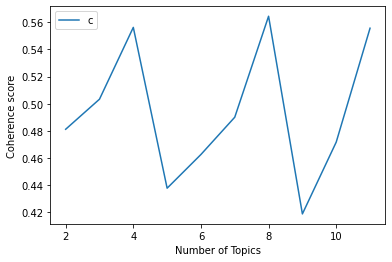

In [ ]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

neutral     96
positive     4
Name: sentiment, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


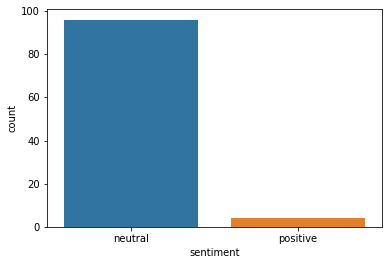

In [8]:
# Write your code here

import seaborn as sns
print(df['sentiment'].value_counts())
sns.countplot(df['sentiment'])



In [53]:
# adapted from Lesson9_code.ipynb
# Load data
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
#from nltk.corpus import movie_reviews
import random


# load docs into list
docs_old = []
for doc in df.abs_stemmed:
  docs_old.append([doc])
#docs[1]

docs = []
for i, row in df.iterrows():
  #print(doc)
  docs.append([row.abs_stemmed.split(), row.sentiment])
#docs[1]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [75]:
# extractor
all_words = ''
for doc in docs:
  #print(doc)
  if doc:
    all_words = all_words + ' ' + ' '.join(doc[0])
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [76]:
all_words

'  concept maximum entropi trace back along multipl thread biblic time recent howev comput becom power enough permit widescal applic concept real world problem statist estim pattern recognit paper describ method statist model base maximum entropi present maximum likelihood approach automat construct maximum entropi model describ implement approach effici use exampl sever problem natur languag process scale condit random field natur languag process term condit term condit copyright work deposit minerva access retain paper address issu cooper linguist natur languag process nlp gener linguist machin translat mt particular focus one direct cooper name applic linguist nlp virtual ignor natur languag process applic descript logic use encod knowledg base syntact semant pragmat element need drive semant interpret natur languag gener process recent descript logic use fulli characteris semant issu involv interpret phase chapter variou propos appear literatur use descript logic natur languag proc

In [77]:
all_words_dist = nltk.FreqDist(all_words)
word_features = list(all_words_dist.keys())[:3000]

def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [80]:
# Train Naive Bayes classifier
featuresets = [(find_features(rev), category) for (rev, category) in docs]
train_set, test_set = featuresets[:80], featuresets[81:]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [81]:
# Test the classifier
print(nltk.classify.accuracy(classifier, test_set))

0.8947368421052632


In [73]:
# Show the most important features as interpreted by Naive Bayes
classifier.show_most_informative_features(5)

Most Informative Features
             contains(j) = False          neutra : positi =      1.1 : 1.0
             contains(â) = False          neutra : positi =      1.1 : 1.0
             contains(c) = False          neutra : positi =      1.1 : 1.0
             contains(l) = False          neutra : positi =      1.1 : 1.0
             contains(f) = False          neutra : positi =      1.1 : 1.0


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('housing_data/train.csv')
test = pd.read_csv('housing_data/test.csv')

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
test.shape

(1459, 80)

In [ ]:
train.shape

(1460, 81)

In [ ]:
corr_matrix = train.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

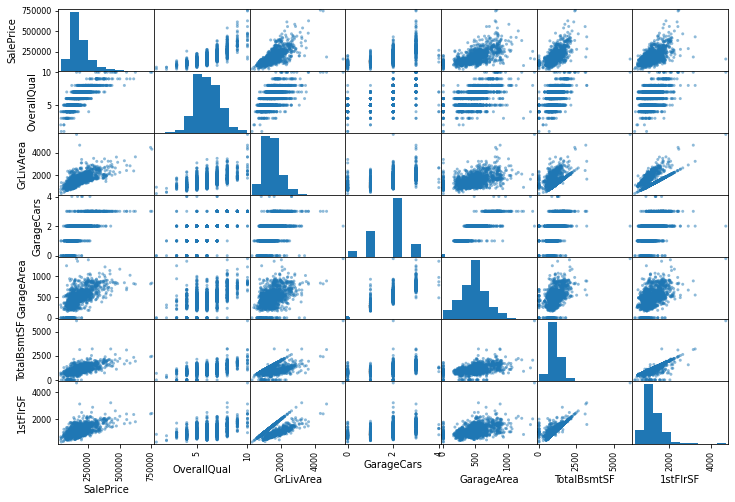

In [ ]:
#plotting top features affecting price
from pandas.plotting import scatter_matrix
attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']
scatter_matrix(train[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

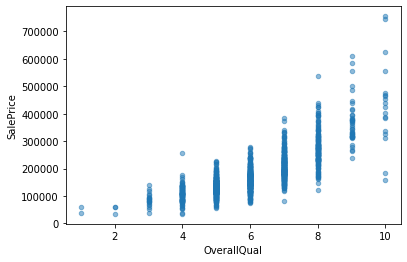

In [ ]:
train.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)
plt.savefig('scatter.png')

In [ ]:
# train data
X_train= train[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']]
y_train = train["SalePrice"]

# test data
X_test = test[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", '1stFlrSF']]
#fix NaN values
test.fillna(0, inplace = True)

In [ ]:
# train model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.score(X_train, y_train)

0.7619179511862831

In [ ]:
# Sale price predictions
predictions = regressor.predict(X_test)
df_predictions = pd.DataFrame({'Predicted Sale Price': predictions})

df_predictions

,Predicted Sale Price
0,113457.503265
1,165325.401681
2,157177.041113
3,179836.887801
4,227017.198181
...,...
1454,59852.316790
1455,78847.395196
1456,151715.379533
1457,92258.212328
